In [1]:
### requirements
# xgboost==1.4.0
# scikit-learn==0.24.1

In [2]:
import pickle
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [3]:
models ='data.p'

updated_model = pickle.load(open(models, "rb"))

In [4]:
def evaluate(model, X_validation, y_validation):
    
    y_hat = model.predict(X_validation)
    
    mse = round(mean_squared_error(y_validation, y_hat), 3)
 
    return mse

# Training models

### BC (Black Carbon)

In [5]:
# best estimator
xgBC_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1,
             eval_metric='rmse', gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.6, verbosity=1)

xgBC_reg.fit(updated_model[0][1]['model_data']['X_train'],updated_model[0][1]['model_data']['y_train'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=1, nthread=1,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             tree_method='exact', validate_parameters=1, ...)

### NO

In [29]:
# best estimator
xgNO_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, eta=0.1,
             eval_metric='rmse', gamma=5, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=10,  n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1.0, verbosity=1)



xgNO_reg.fit(updated_model[1][1]['model_data']['X_train'],updated_model[1][1]['model_data']['y_train'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, eta=0.1,
             eval_metric='rmse', gamma=5, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=1, nthread=1,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, silent=None, subsample=1.0,
             tree_method='exact', validate_parameters=1, ...)

### NO2

In [30]:
# best estimator
xgNO2_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, eta=0.1,
             eval_metric='rmse', gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=10,  n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1.0, verbosity=1)



xgNO2_reg.fit(updated_model[2][1]['model_data']['X_train'],updated_model[2][1]['model_data']['y_train'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, eta=0.1,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=1, nthread=1,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, silent=None, subsample=1.0,
             tree_method='exact', validate_parameters=1, ...)

# Fig 5.4 (Thesis)

In [31]:
predsTrainBC = xgBC_reg.predict(updated_model[0][1]['model_data']['X_train'])
predsTrainNO = xgNO_reg.predict(updated_model[1][1]['model_data']['X_train'])
predsTrainNO2 = xgNO2_reg.predict(updated_model[2][1]['model_data']['X_train'])

predsValBC = xgBC_reg.predict(updated_model[0][1]['model_data']['X_validation'])
predsValNO = xgNO_reg.predict(updated_model[1][1]['model_data']['X_validation'])
predsValNO2 = xgNO2_reg.predict(updated_model[2][1]['model_data']['X_validation'])

/home/ronaldo/anaconda/envs/pyML/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


/home/ronaldo/anaconda/envs/pyML/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/home/ronaldo/anaconda/envs/pyML/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


Text(0.1, 0.9, 'MSE: 15.88')

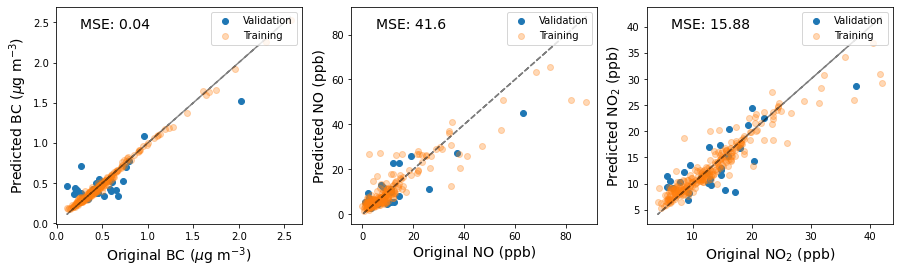

In [32]:
import matplotlib.pyplot as plt

concentration_labels = {
    'BC': r'$\mu$g m$^{-3}$',
    'NO': r'ppb',
    'NO2': r'ppb'
}

pollutant = {'BC': 'BC', 'NO': 'NO', 'NO2': r'NO$_2$'}

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 4))

### BC
y=updated_model[0][1]['model_data']['y_validation']
ax[0].scatter(y, predsValBC, label='Validation')

mse=evaluate(xgBC_reg,updated_model[0][1]['model_data']['X_validation'],y)
y=updated_model[0][1]['model_data']['y_train']
ax[0].scatter(y, predsTrainBC, label='Training', alpha=0.3)
ax[0].plot(y, y, '--', c='black', alpha=0.5)
ax[0].set_xlabel('Original {} ({})'.format(pollutant['BC'],concentration_labels['BC']),fontsize=14)
ax[0].set_ylabel('Predicted {} ({})'.format(pollutant['BC'],concentration_labels['BC']),fontsize=14)
ax[0].legend(loc='upper right')
ax[0].text(0.10, 0.9, f'MSE: {round(mse, 2)}',fontsize=14,transform=ax[0].transAxes)

### NO
y=updated_model[1][1]['model_data']['y_validation']
ax[1].scatter(y, predsValNO, label='Validation')

mse=evaluate(xgNO_reg,updated_model[1][1]['model_data']['X_validation'],y)
y=updated_model[1][1]['model_data']['y_train']
ax[1].scatter(y, predsTrainNO, label='Training', alpha=0.3)
ax[1].plot(y, y, '--', c='black', alpha=0.5)
ax[1].set_xlabel('Original {} ({})'.format(pollutant['NO'],concentration_labels['NO']),fontsize=14)
ax[1].set_ylabel('Predicted {} ({})'.format(pollutant['NO'],concentration_labels['NO']),fontsize=14)
ax[1].legend(loc='upper right')
ax[1].text(0.10, 0.9, f'MSE: {round(mse, 2)}',fontsize=14,transform=ax[1].transAxes)

# ### NO2
y=updated_model[2][1]['model_data']['y_validation']
ax[2].scatter(y, predsValNO2, label='Validation')

mse=evaluate(xgNO2_reg,updated_model[2][1]['model_data']['X_validation'],y)
y=updated_model[2][1]['model_data']['y_train']
ax[2].scatter(y, predsTrainNO2, label='Training', alpha=0.3)
ax[2].plot(y, y, '--', c='black', alpha=0.5)
ax[2].set_xlabel('Original {} ({})'.format(pollutant['NO2'],concentration_labels['NO2']),fontsize=14)
ax[2].set_ylabel('Predicted {} ({})'.format(pollutant['NO2'],concentration_labels['NO2']),fontsize=14)
ax[2].legend(loc='upper right')
ax[2].text(0.10, 0.9, f'MSE: {round(mse, 2)}',fontsize=14,transform=ax[2].transAxes)

In [33]:
### Save models in pickle
models={'BC':xgBC_reg,'NO':xgNO_reg,'NO2':xgNO2_reg}

filehandler = open("models.p","wb")
pickle.dump(models,filehandler)
filehandler.close()